In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../')
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])

In [2]:
import normet.autodew as ad
import normet.cpd as cpd

In [3]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [4]:
df_dew=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75)

In [5]:
df_dew1=df_dew.loc['2019-11-01':'2020-05-01'].resample('1D').mean()

In [6]:
df_dew1.head()

,Observed,Deweathered
date,,
2019-11-01,26.375,55.210087
2019-11-02,28.000,55.136242
2019-11-03,32.375,54.981464
2019-11-04,52.000,52.761253
2019-11-05,39.375,53.177822


In [7]:
pt=cpd.rpt_breakpoints(df_dew1,'Deweathered',window=7, n=5)

In [8]:
pt

DatetimeIndex(['2019-11-15', '2020-02-03', '2020-02-13', '2020-02-28',
               '2020-03-29'],
              dtype='datetime64[ns]', name='date', freq=None)

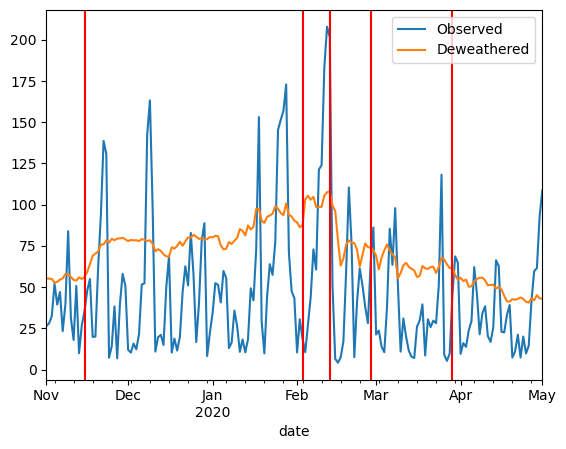

In [9]:
fig,ax=plt.subplots()
df_dew1.plot(ax=ax)
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')

#ax.legend()